In [12]:
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
x=pd.read_csv("reg.csv")
x

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14-May-17,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15-Feb-16,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14-Jun-17,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15-Jan-16,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [14]:
x['Sale Price'].mean()

540198.4357443658

C:\Users\vijay\AppData\Local\Temp\ipykernel_1704\1071452808.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x['new_colm'][x['Condition of the House'] == str(i)]=x['Sale Price'][x['Condition of the House']==str(i)].mean()
C:\Users\vijay\A

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

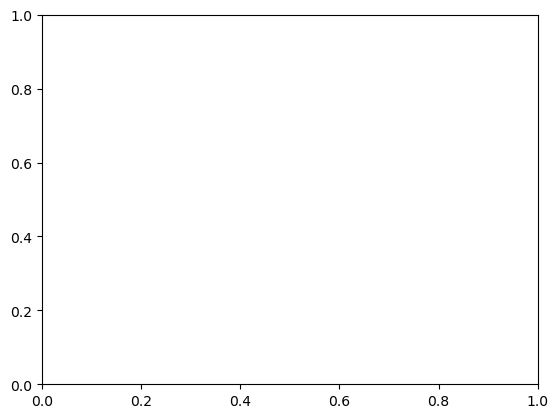

In [16]:
#initialize a new coloum 
x['new_colm']=0
#calculate mean base on condition of the house 
for i in x['Condition of the House'].unique():
    x['new_colm'][x['Condition of the House'] == str(i)]=x['Sale Price'][x['Condition of the House']==str(i)].mean()

plt.figure(dpi=100)
plt.bar(x['Condition of the House'].unique,x['new_colm'].unique)  
plt.xlabel('Condition of the House')
plt.ylabel('mean sale price')
plt.show()

In [19]:
#mean sale price wrt condi of the house and zipcode
zcs=x.groupby(['Condition of the House','Zipcode'])['Sale Price'].mean()
zcs

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

In [20]:
sale price mean wrt condition of the house
cs=x.groupby(['Condition of the House'])['Sale Price'].mean()
cs

Condition of the House
Bad          334431.666667
Excellent    612577.742504
Fair         542130.611206
Good         521277.510567
Okay         327316.215116
Name: Sale Price, dtype: float64

In [21]:
#USING pandas.pivot_table() function
import pandas as pd

In [36]:
import pandas as pd
x=pd.read_csv('reg.csv')
zcs=pd.pivot_table(x,index=['Condition of the House','Zipcode'],values=['Sale Price'],aggfunc=np.mean)
zcs

C:\Users\vijay\AppData\Local\Temp\ipykernel_1704\2538133389.py:3: FutureWarning: The provided callable <function mean at 0x000001C420A64EA0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  zcs=pd.pivot_table(x,index=['Condition of the House','Zipcode'],values=['Sale Price'],aggfunc=np.mean)


Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [22]:
import numpy as np

In [29]:
zcs1=pd.pivot_table(x,index=['Zipcode'],columns =['Condition of the House'],values=['Sale Price'],aggfunc=np.mean)
zcs1

C:\Users\vijay\AppData\Local\Temp\ipykernel_1704\1249085076.py:1: FutureWarning: The provided callable <function mean at 0x000001C420A64EA0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  zcs1=pd.pivot_table(x,index=['Zipcode'],columns =['Condition of the House'],values=['Sale Price'],aggfunc=np.mean)


Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [35]:
import pandas as pd
x=pd.read_csv('reg.csv')
x["Condition of the House"]=x["Condition of the House"].map({'Good':'1','Excellent':'3','Bad':'0'})
x["Condition of the House"].unique()

array([nan, '3', '1', '0'], dtype=object)

In [41]:
#extract year in new column 
year=[]
for i in range(len(x['Date House was Sold'])):
    k=x['Date House was Sold'][i].split("-")[-1]
    year.append(k)
x['year_sold']=year
x['year_sold'].head()

0    17
1    17
2    16
3    17
4    16
Name: year_sold, dtype: object

In [42]:
#using map func
def year(value):
    return value.split('-')[-1]
x["year_sold"]=x['Date House was Sold'].map(year)
x['year_sold'].head()

0    17
1    17
2    16
3    17
4    16
Name: year_sold, dtype: object

In [51]:
# using apply func
import pandas as pd
x=pd.read_csv('reg.csv')

def luxury_home(row):
    count =0
   # if row[0] =='Yes':
    #    count=count+1
    if row[0] in ['Good','Excellent']:
        count=count+1
 #   if row[2]>=8:
  #      count=count+1
    if count >=1:
        return 'Yes'
    else: 
        return 'No'
x['luxury_home']=x[[Condition of the House'].apply('luxury_home',axis=1)
x['luxury_home'].unique()

SyntaxError: unterminated string literal (detected at line 17) (1802161355.py, line 17)